## Importing Python Libraries for EDA Analysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Reading Data From CSV file

In [52]:
df = pd.read_csv('data/heart.csv')
df = pd.DataFrame(df)

Shape of the DataSet

In [53]:
df.shape

(918, 12)

# Attribute Information
~ Age: age of the patient [years] 

~ Sex: sex of the patient [M: Male, F: Female] 

~ ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

~ RestingBP: resting blood pressure [mm Hg]

~ Cholesterol: serum cholesterol [mm/dl]

~ FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

~ RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

~ MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

~ ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

~ Oldpeak: oldpeak = ST [Numeric value measured in depression]

~ ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

~ HeartDisease: output class [1: heart disease, 0: Normal]

Checking Missing Values From the DataSet

In [54]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking for Duplicate Rows in DataSet

In [55]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

Dropping the Duplicates from teh DataSet and Filling the Null Values

In [56]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope 

Checking the Number of Unique Values in DataSet

In [57]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Checking the Statistics of the DataSet

In [58]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Retrieving Info of the DataFrame/DataSet

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploring the DataSet ##
Checking for total Numerical and Categgorical Columns in the DataSet

In [60]:
print("Categories in Gender column: ",end='')
print(df['Sex'].unique())

print("Categories in ChestPainType column: ",end='')
print(df['ChestPainType'].unique())

print("Categories in ExerciseAngina column: ",end='')
print(df['ExerciseAngina'].unique())

print("Categories in ST_Slope column: ",end='')
print(df['ST_Slope'].unique())

print("Categories in RestingECG column: ",end='')
print(df['RestingECG'].unique())

Categories in Gender column: ['M' 'F']
Categories in ChestPainType column: ['ATA' 'NAP' 'ASY' 'TA']
Categories in ExerciseAngina column: ['N' 'Y']
Categories in ST_Slope column: ['Up' 'Flat' 'Down']
Categories in RestingECG column: ['Normal' 'ST' 'LVH']


In [61]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}\n'.format(len(num_features),num_features))
print('we have {} categorical features: {}'.format(len(cat_features),cat_features))

we have 7 numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

we have 5 categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Visualization ##

Histogram & KDE

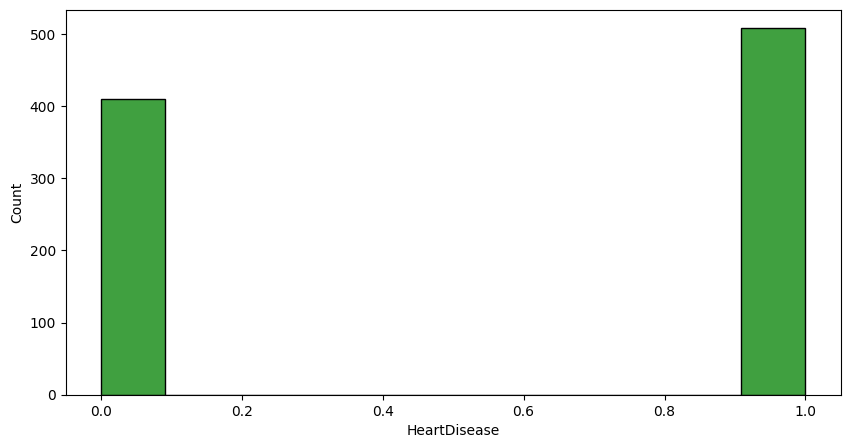

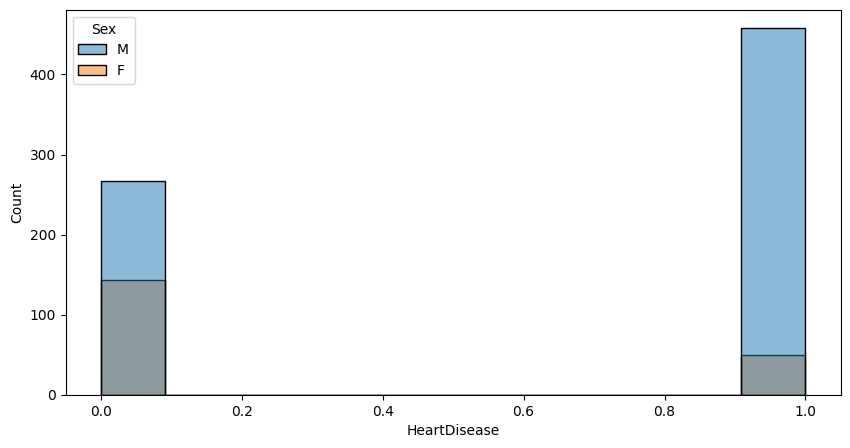

In [63]:
fig, axs = plt.subplots(1, 1, figsize = (10,5))
plt.subplot(1,1,1)
sns.histplot(data=df,x = 'HeartDisease',color='g')
plt.show()
fig, axs = plt.subplots(1, 1, figsize = (10,5))
plt.subplot(1,1,1)
sns.histplot(data=df,x='HeartDisease',hue='Sex')
plt.show()

#### Insights
Based on the Histogram we can say that the Male patients tend to get heart diseases more when compared to female patients

KeyboardInterrupt: 

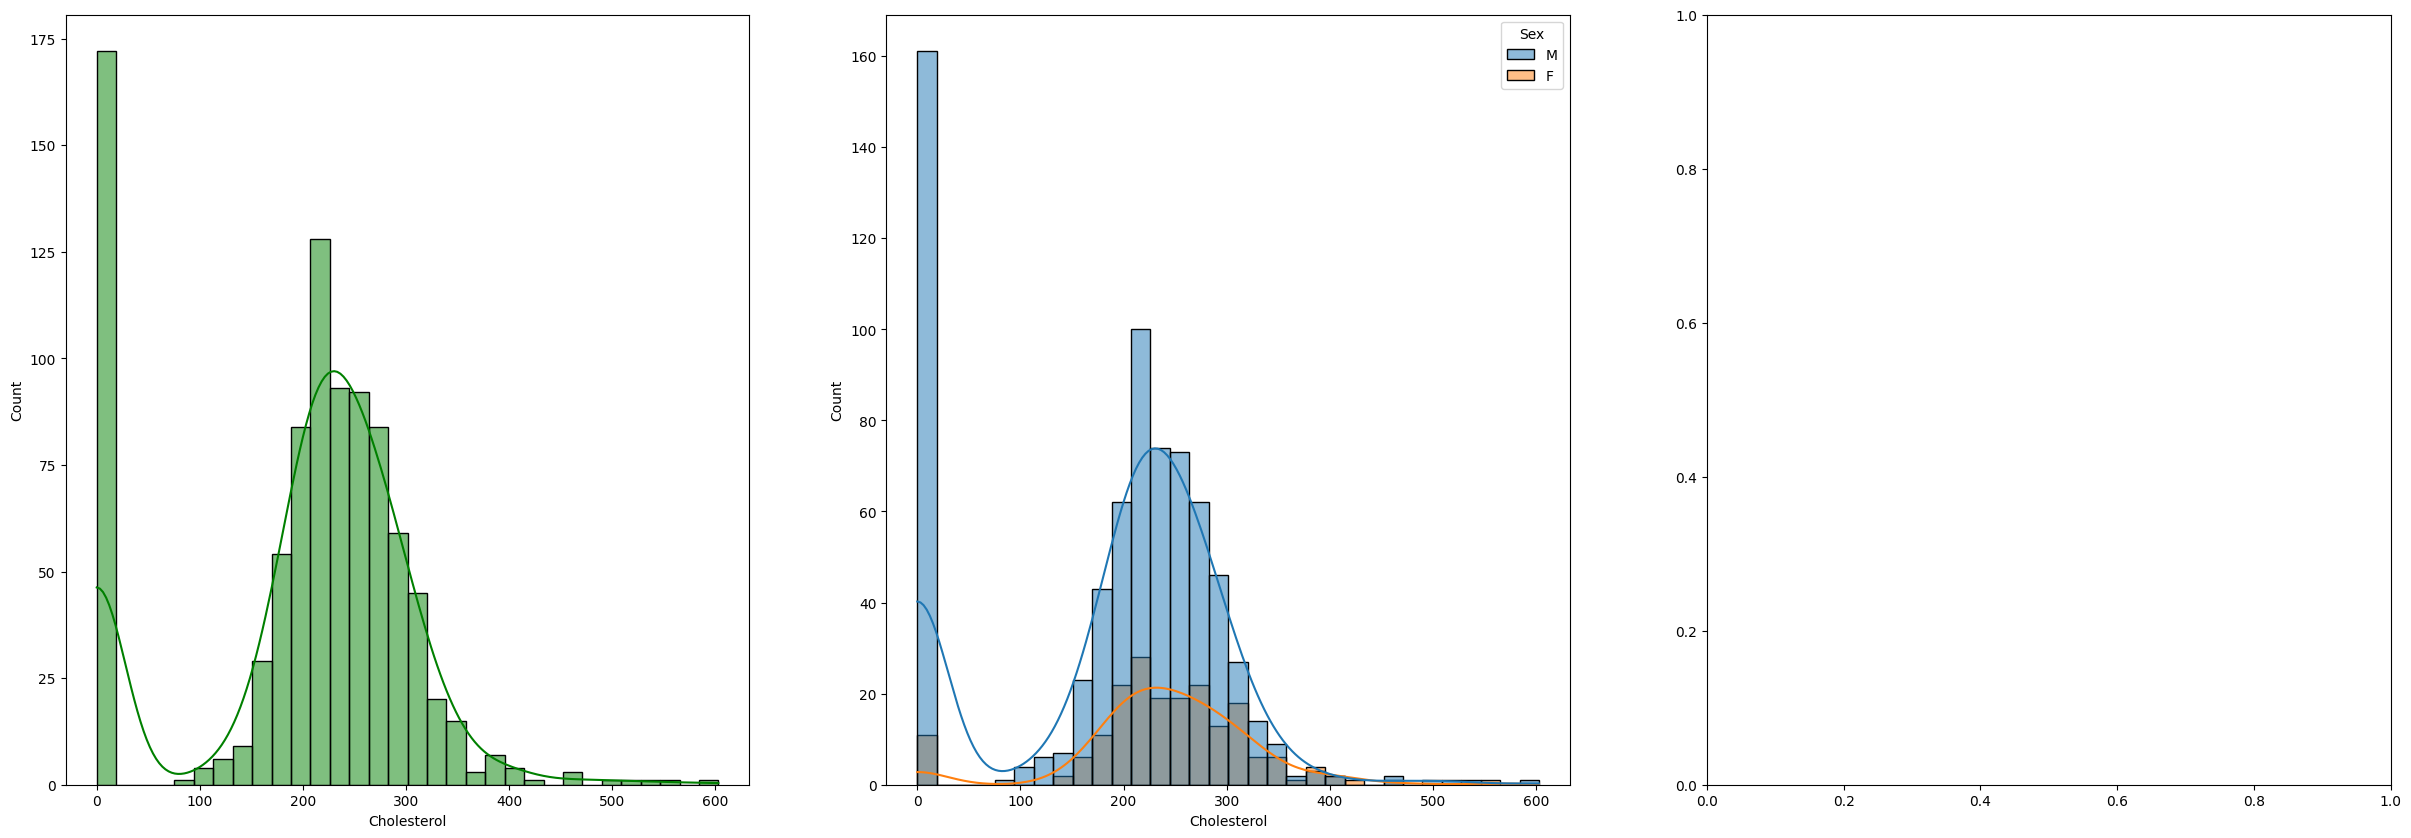

In [64]:
fig, axs = plt.subplots(1, 3, figsize = (30,10))
plt.subplot(131)
sns.histplot(data=df,x = 'Cholesterol',kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='Cholesterol',hue='Sex',kde=True)
plt.subplot(133)
sns.histplot(data=df,x='Cholesterol',hue='HeartDisease',kde=True)
plt.show()

#### Insights 
From the plotted Histogram we can observe that the Cholesterol level in Male patients is high compared to female patients
#
From subplot3 we can observe that the probability of getting a heart disease is high when cholestrol level is 0 or is greater than 300

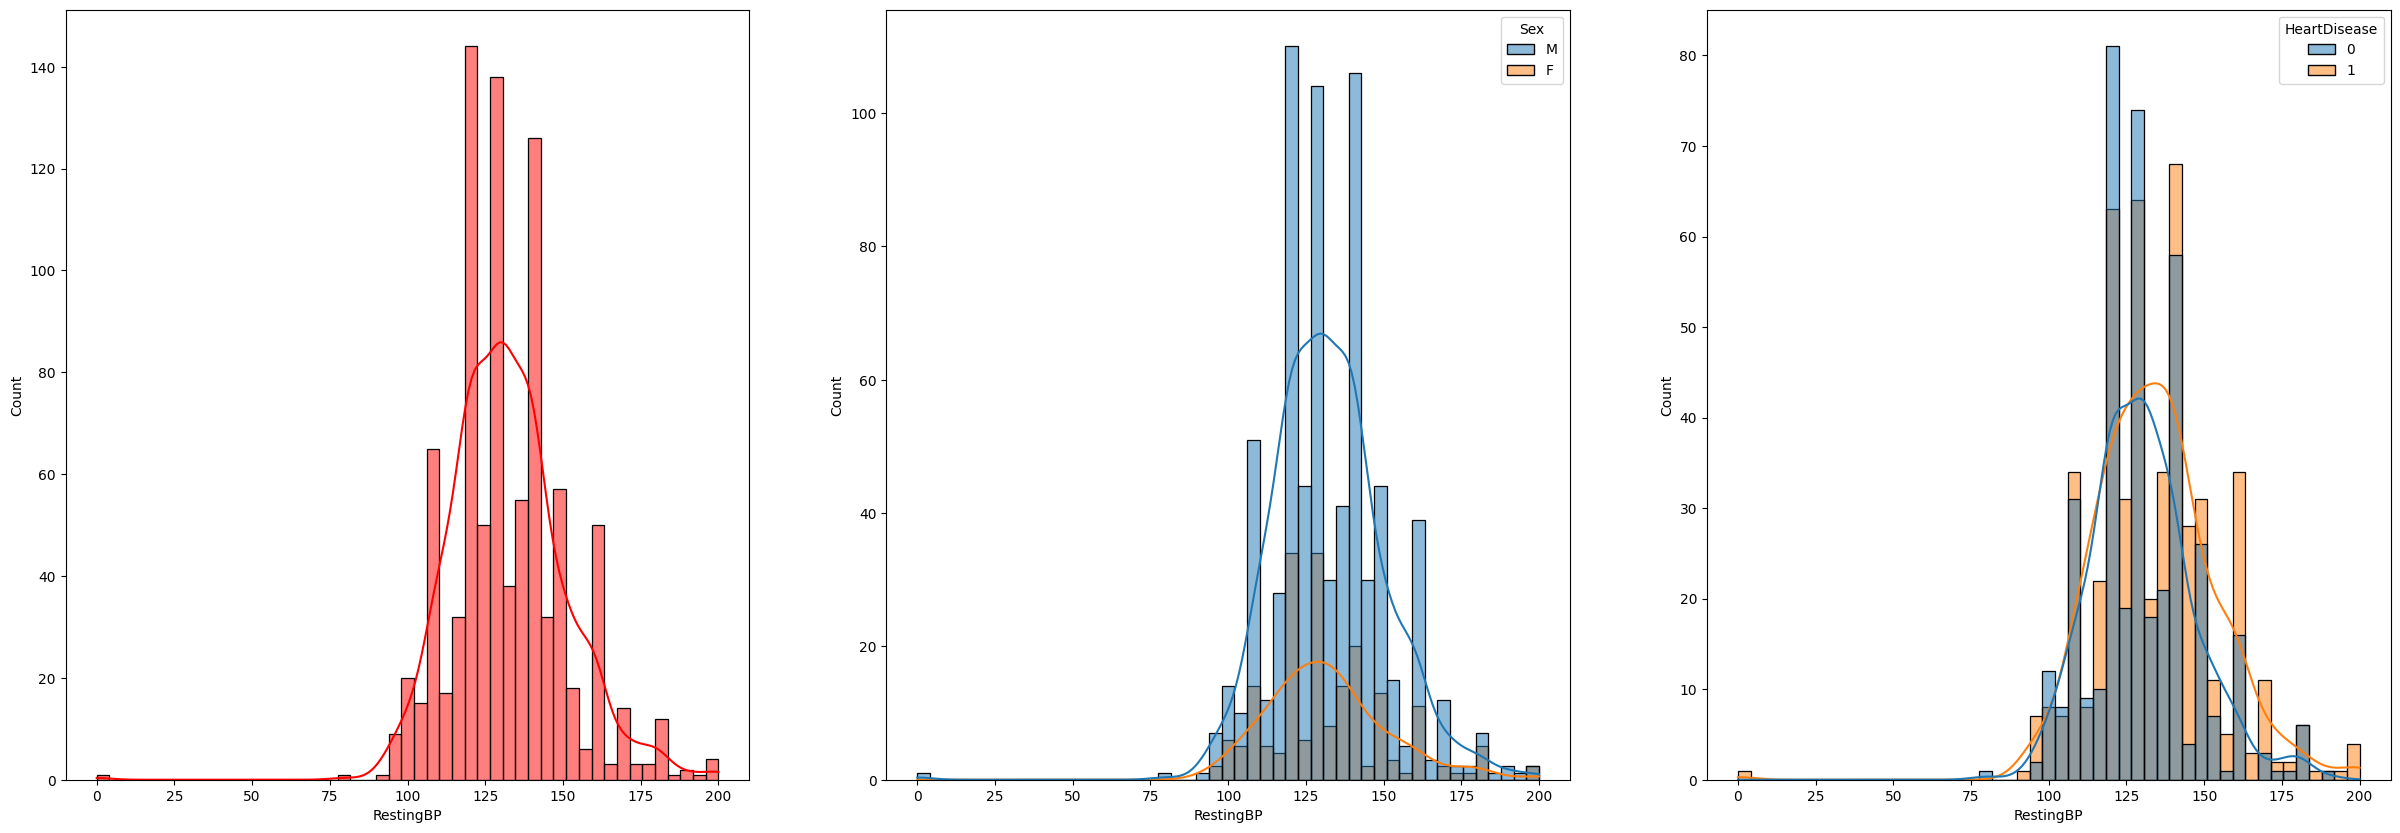

In [ ]:
fig, axs = plt.subplots(1,3,figsize = (30,10))
plt.subplot(131)
sns.histplot(data=df,x='RestingBP',kde=True,color='r')
plt.subplot(132)
sns.histplot(data=df,x='RestingBP',hue='Sex',kde=True)
plt.subplot(133)
sns.histplot(data=df,x='RestingBP',hue='HeartDisease',kde=True)
plt.show()

#### Insights
From the Histogram plot we can observe that the RestingBP levels in Male patients is high when compared to female patients
# 
from the subplot3 we can observe the probality of getting a HeartDisease is high when RestingBP leevel greater then 100 or is 0

#### Converting Gender into Numerical Feature

In [ ]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


## MultiVariate Analysis using pieplot

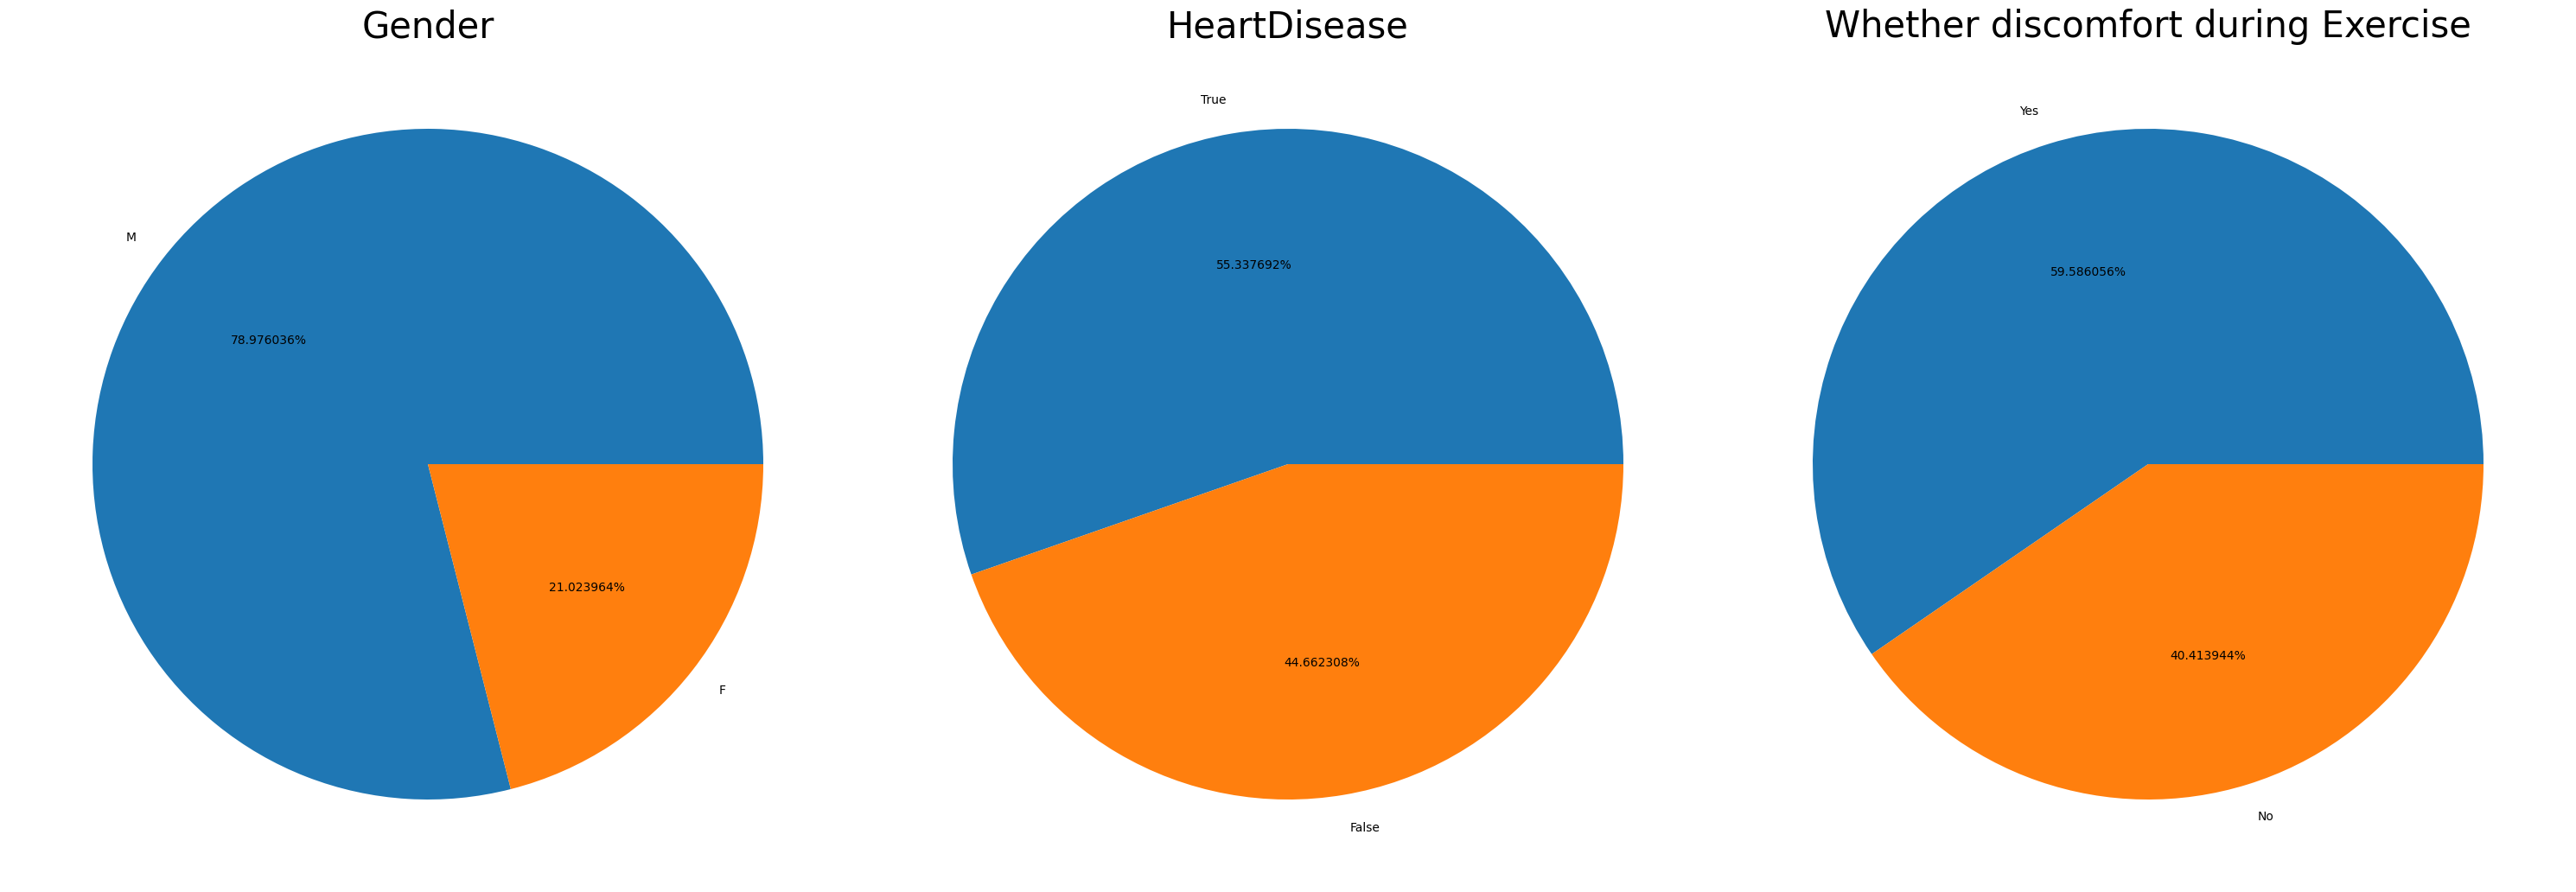

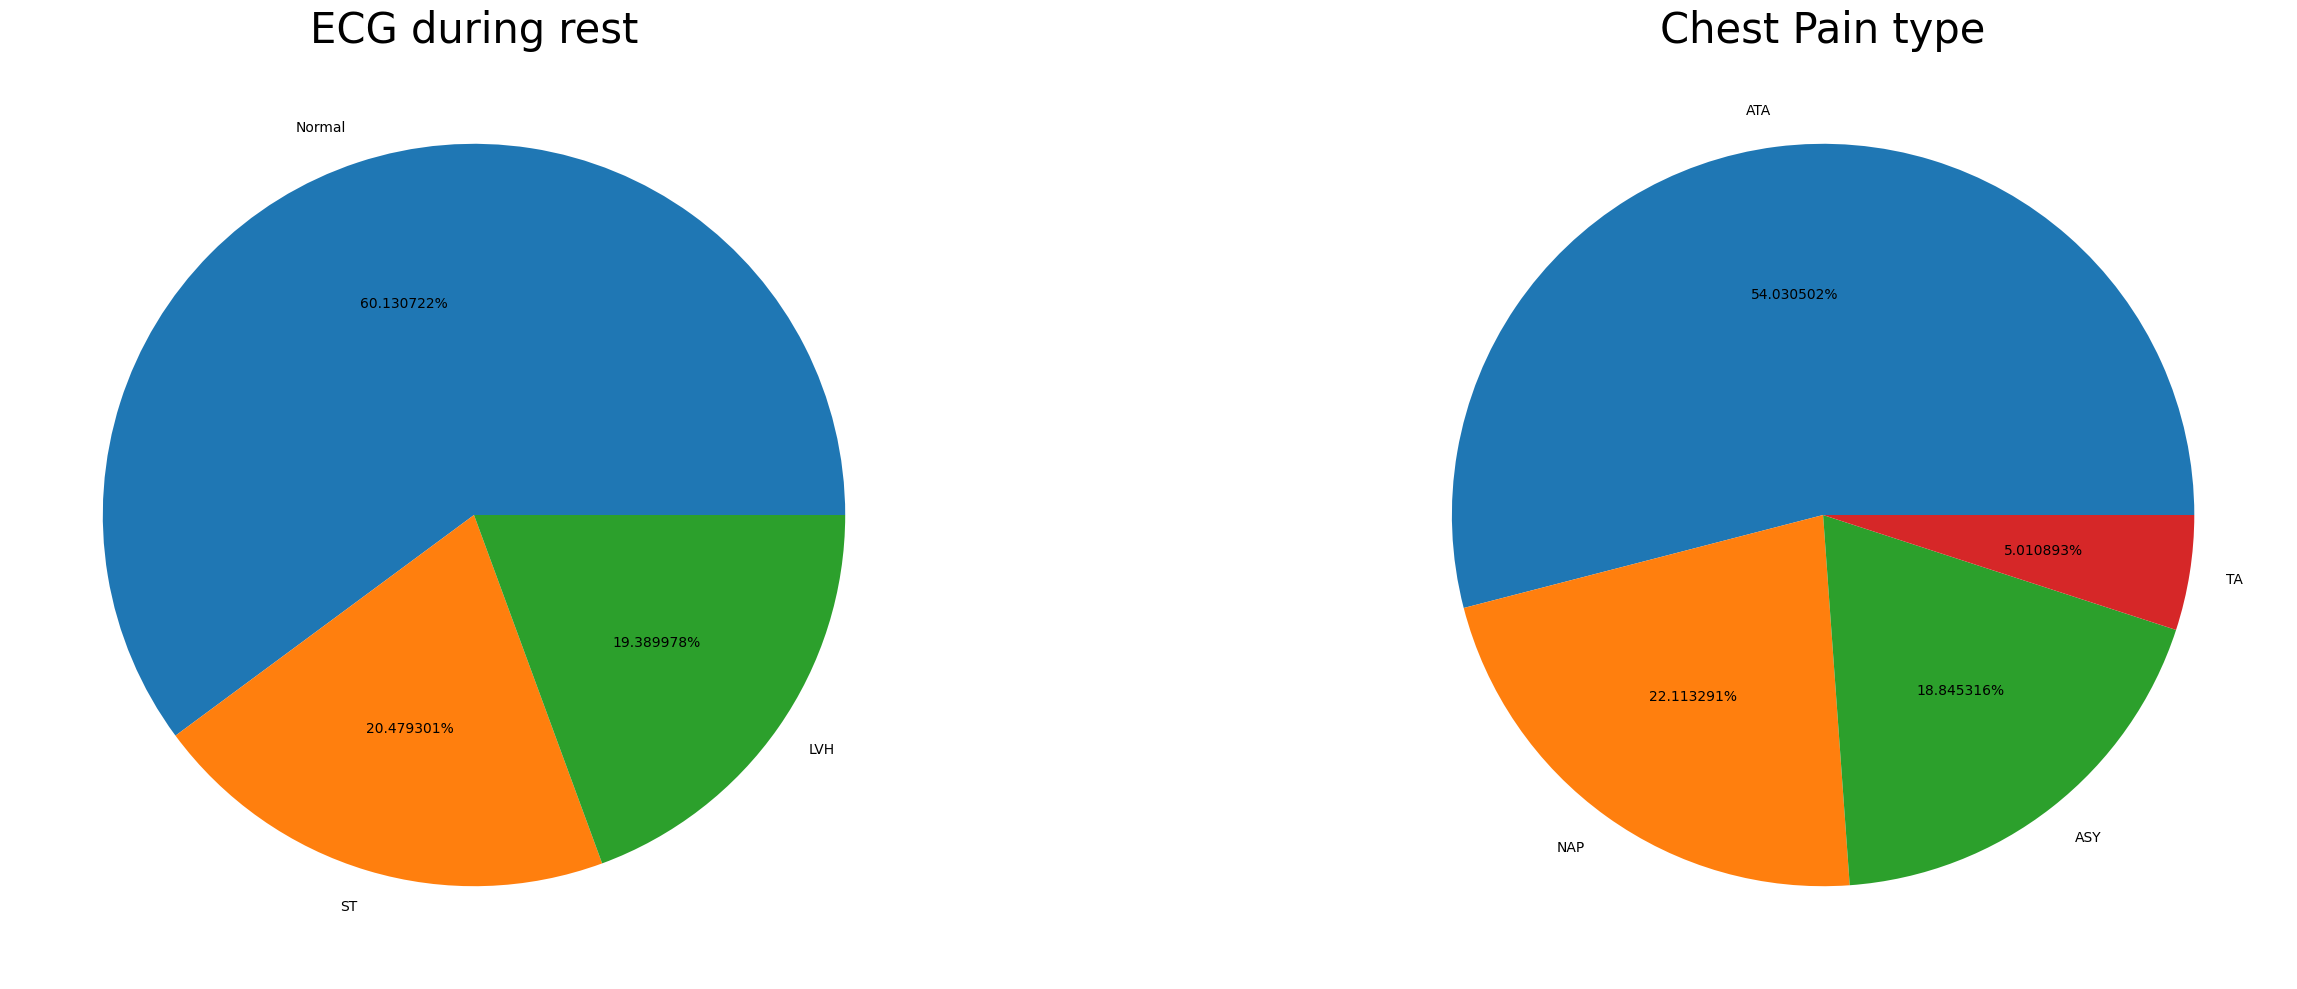

In [ ]:
plt.rcParams['figure.figsize'] = (30,10)

plt.subplot(1,3,1)
size = df['Sex'].value_counts()
labels = 'M','F'

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize = 30)
plt.axis('off')

plt.subplot(1,3,2)
size = df['HeartDisease'].value_counts()
labels = 'True','False'

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title('HeartDisease',fontsize = 30)
plt.axis('off')

plt.subplot(1,3,3)
size = df['ExerciseAngina'].value_counts()
labels = 'Yes','No'

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title('Whether discomfort during Exercise',fontsize = 30)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = (30,10)

plt.subplot(1,2,1)
size = df['RestingECG'].value_counts()
labels = 'Normal','ST','LVH'

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title('ECG during rest',fontsize = 30)
plt.axis('off')

plt.subplot(1,2,2)
size = df['ChestPainType'].value_counts()
labels = 'ATA','NAP','ASY','TA'

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title('Chest Pain type',fontsize = 30)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

UniVariate Analysis

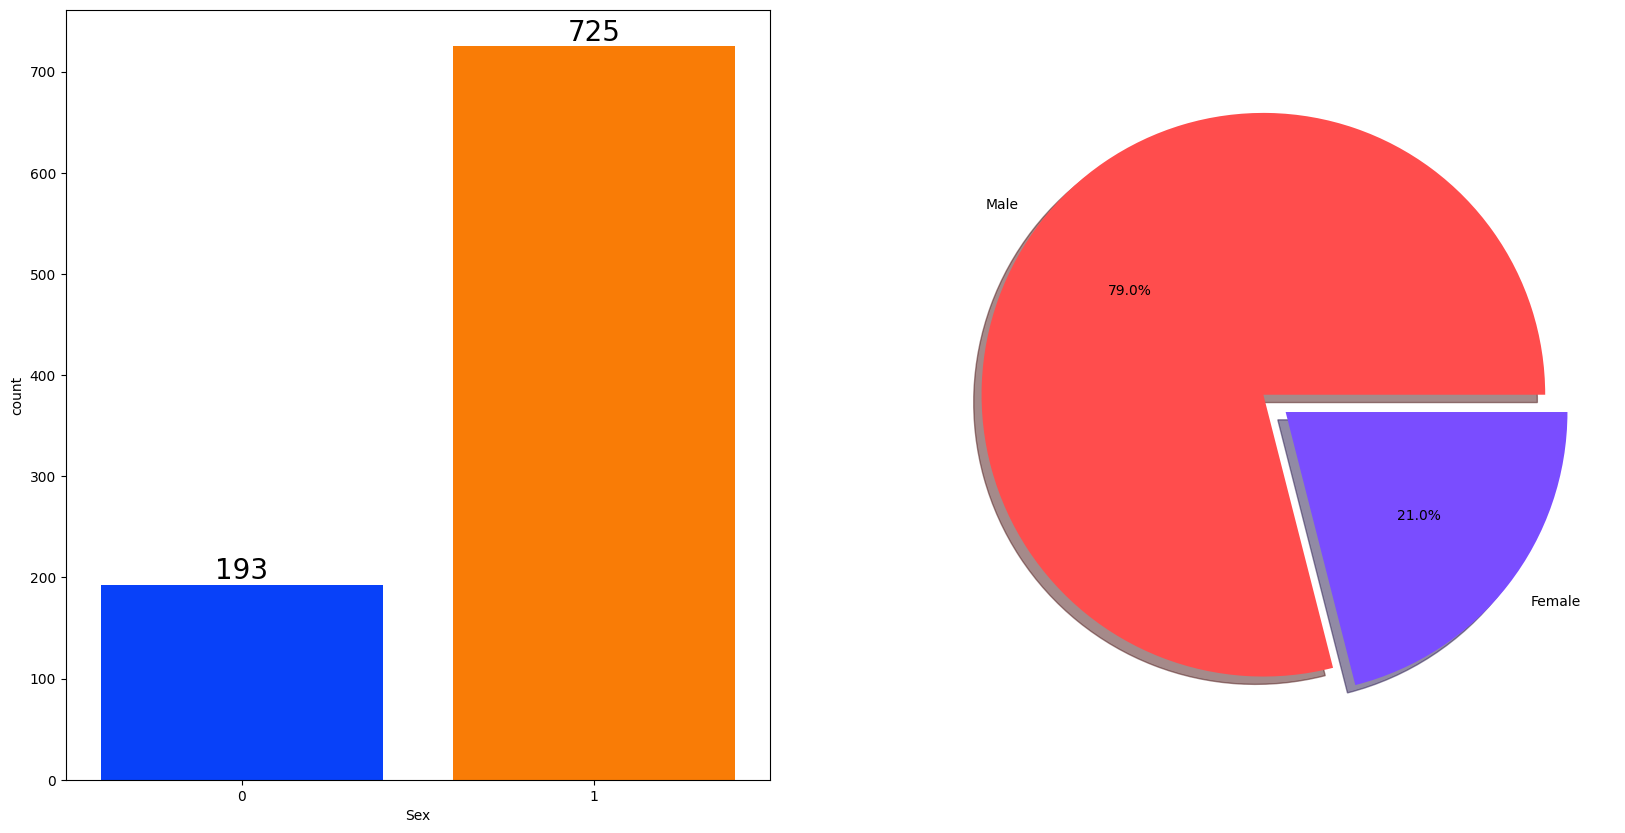

In [ ]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df['Sex'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=20)

plt.pie(x = df['Sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d',"#7a4dff"])
plt.show()

BiVariate Analysis

<Axes: xlabel='ST_Slope', ylabel='Cholesterol'>

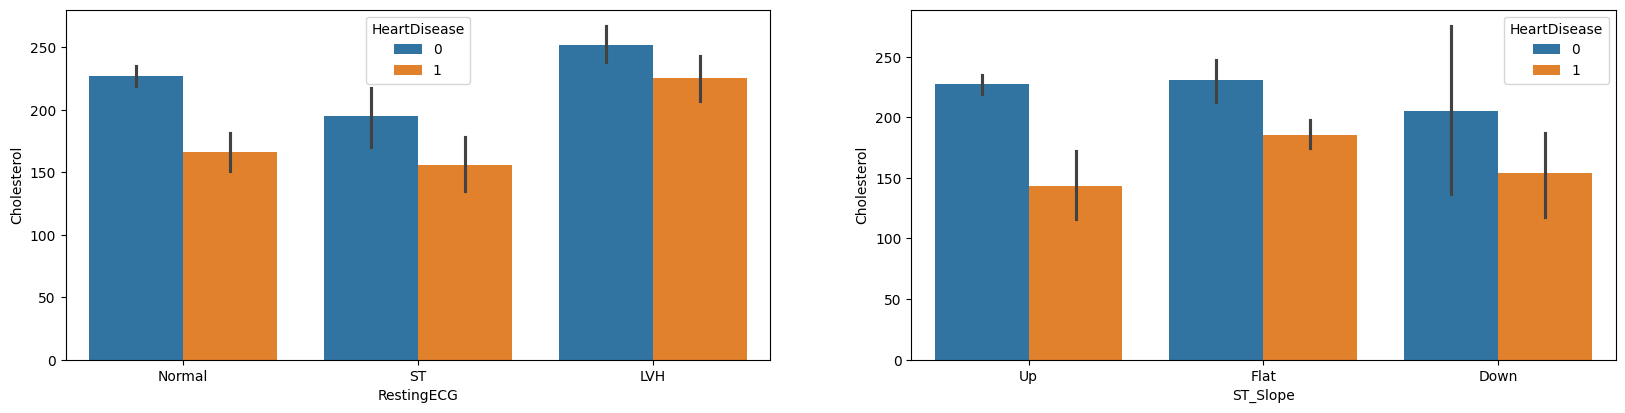

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x=df['RestingECG'],y=df['Cholesterol'],hue=df['HeartDisease'])
plt.subplot(2,2,2)
sns.barplot(x=df['ST_Slope'],y=df['Cholesterol'],hue=df['HeartDisease'])

Checking Outliers

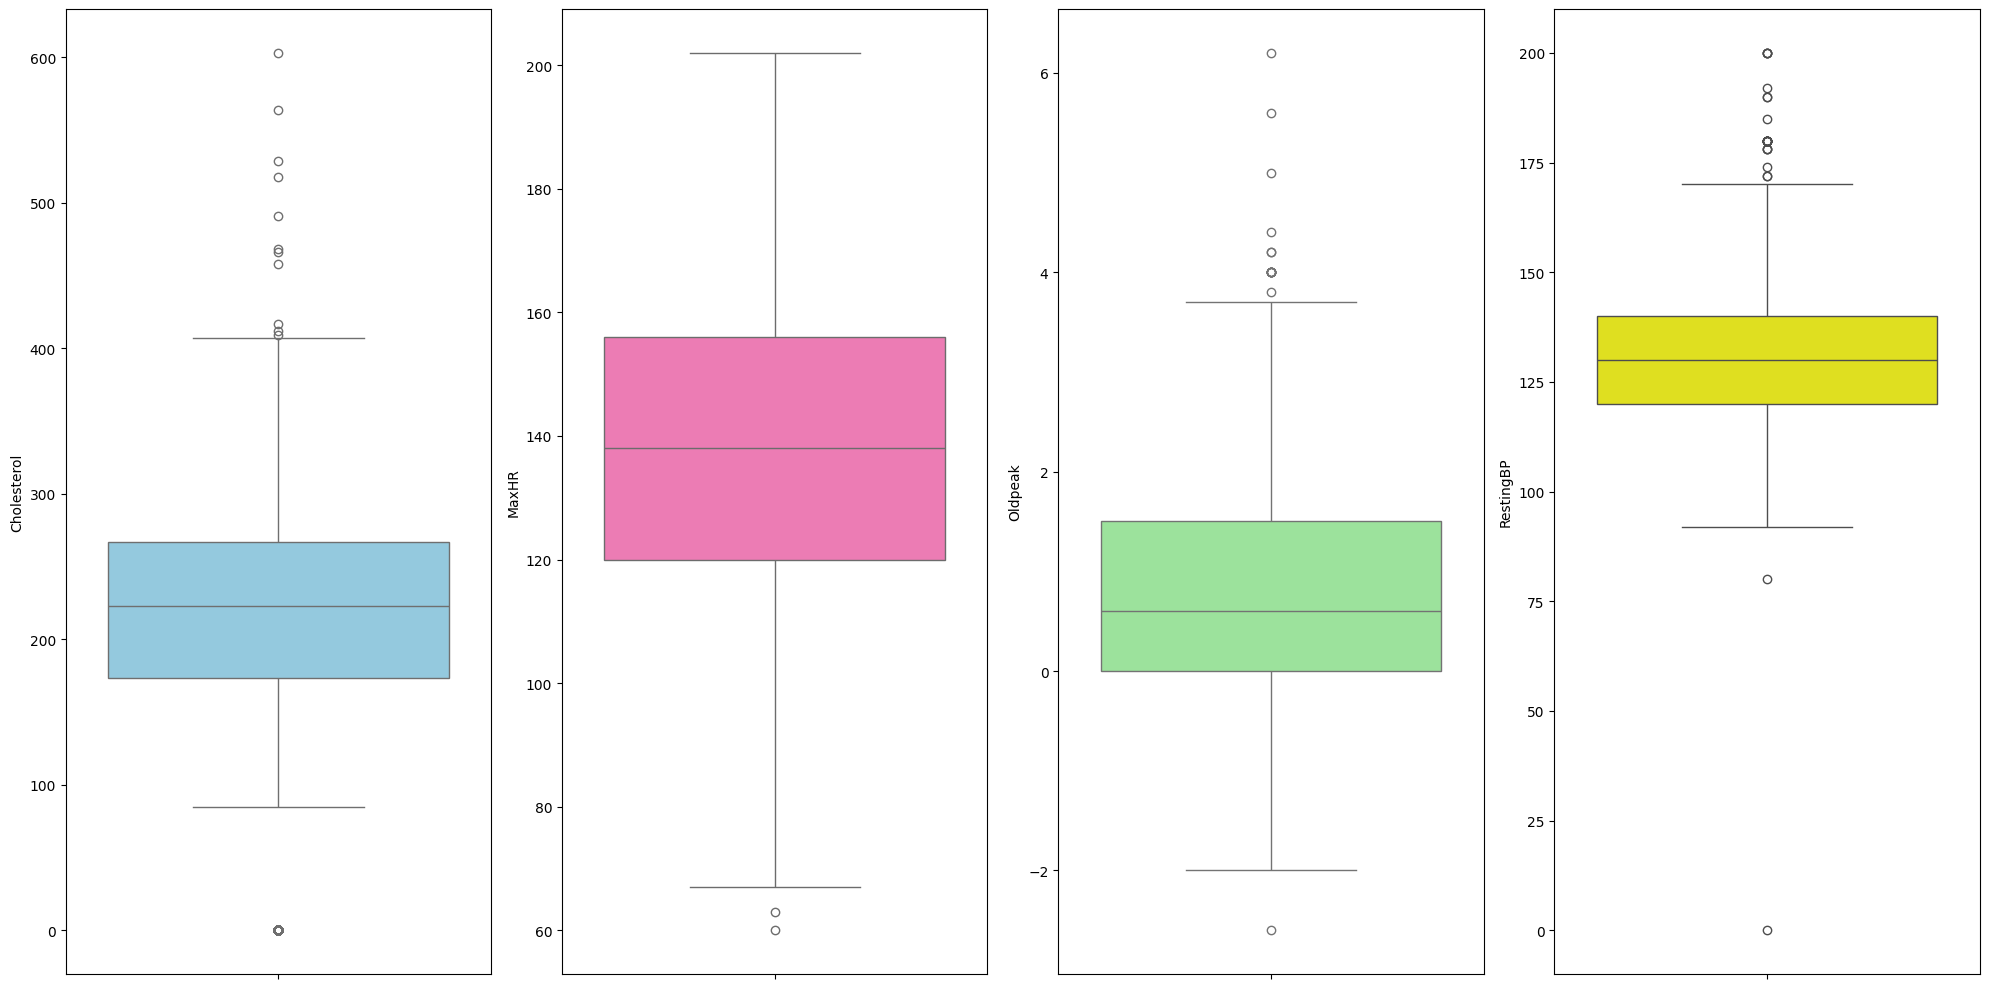

In [ ]:
plt.subplots(1,4,figsize = (20,10))
plt.subplot(1,4,1)
sns.boxplot(df['Cholesterol'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['MaxHR'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['Oldpeak'],color='lightgreen')
plt.subplot(1,4,4)
sns.boxplot(df['RestingBP'],color='yellow')
plt.tight_layout()
plt.show()

MultiVariate Analysis Using Pairplot

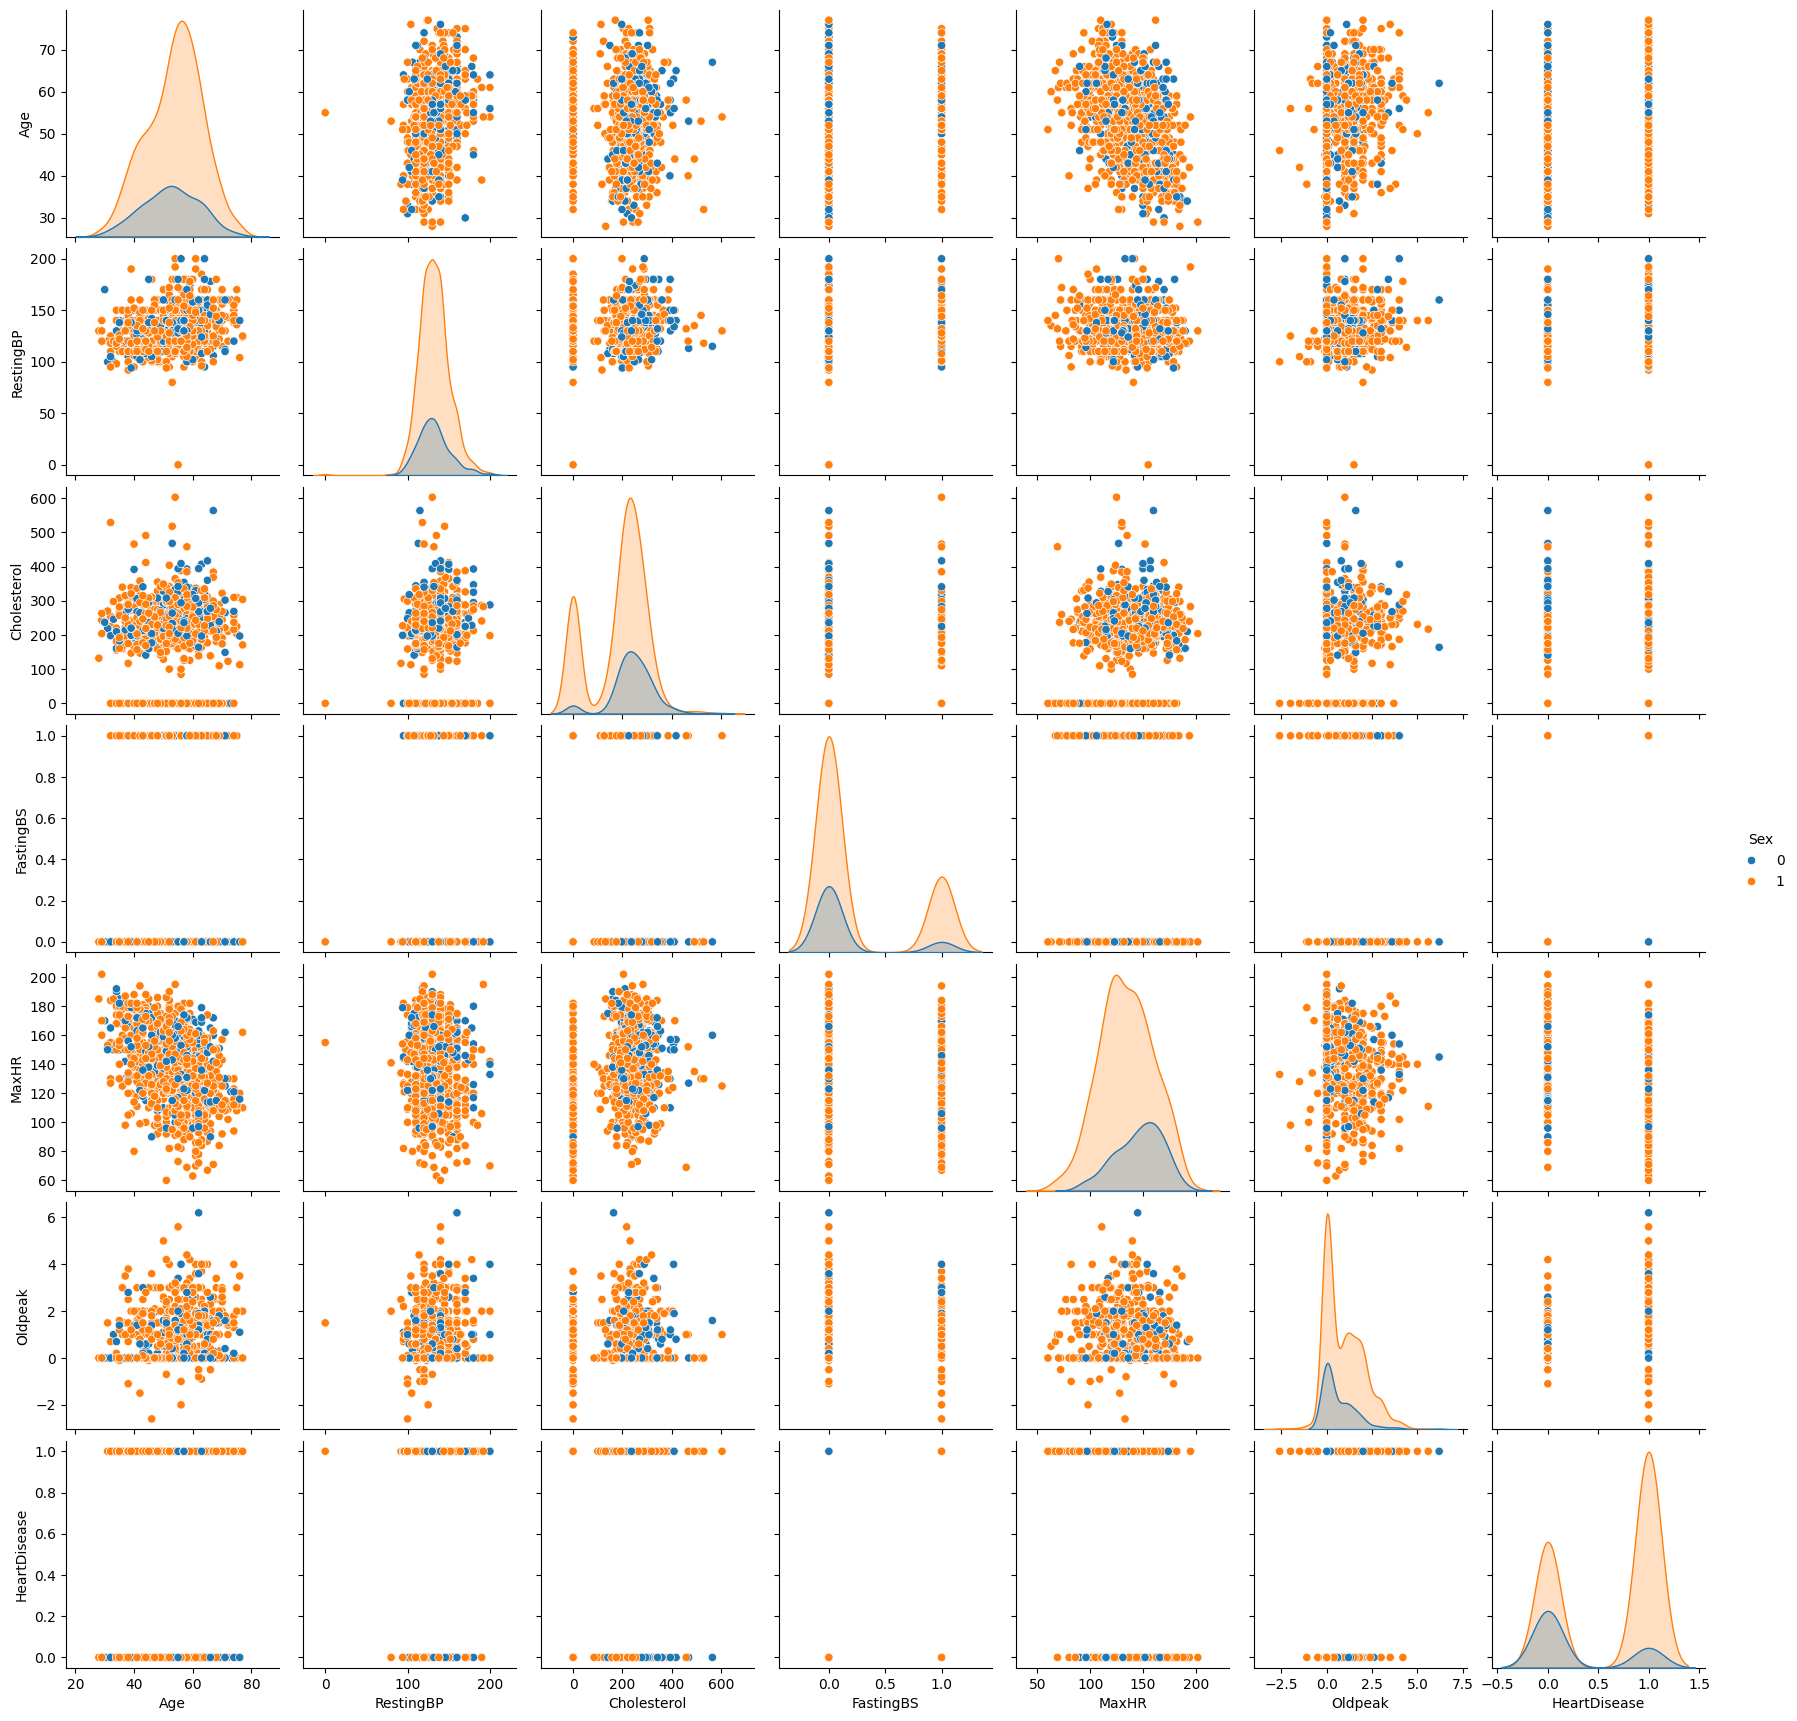

In [ ]:
sns.pairplot(df,hue='Sex')
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Removing Outliers from the Dataset

In [ ]:
columns = ['Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df
df = remove_outliers_iqr(df, columns)
df.shape


(735, 12)

# Cleaned Data after eliminating outliers

In [ ]:
print(df.head())

   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0  


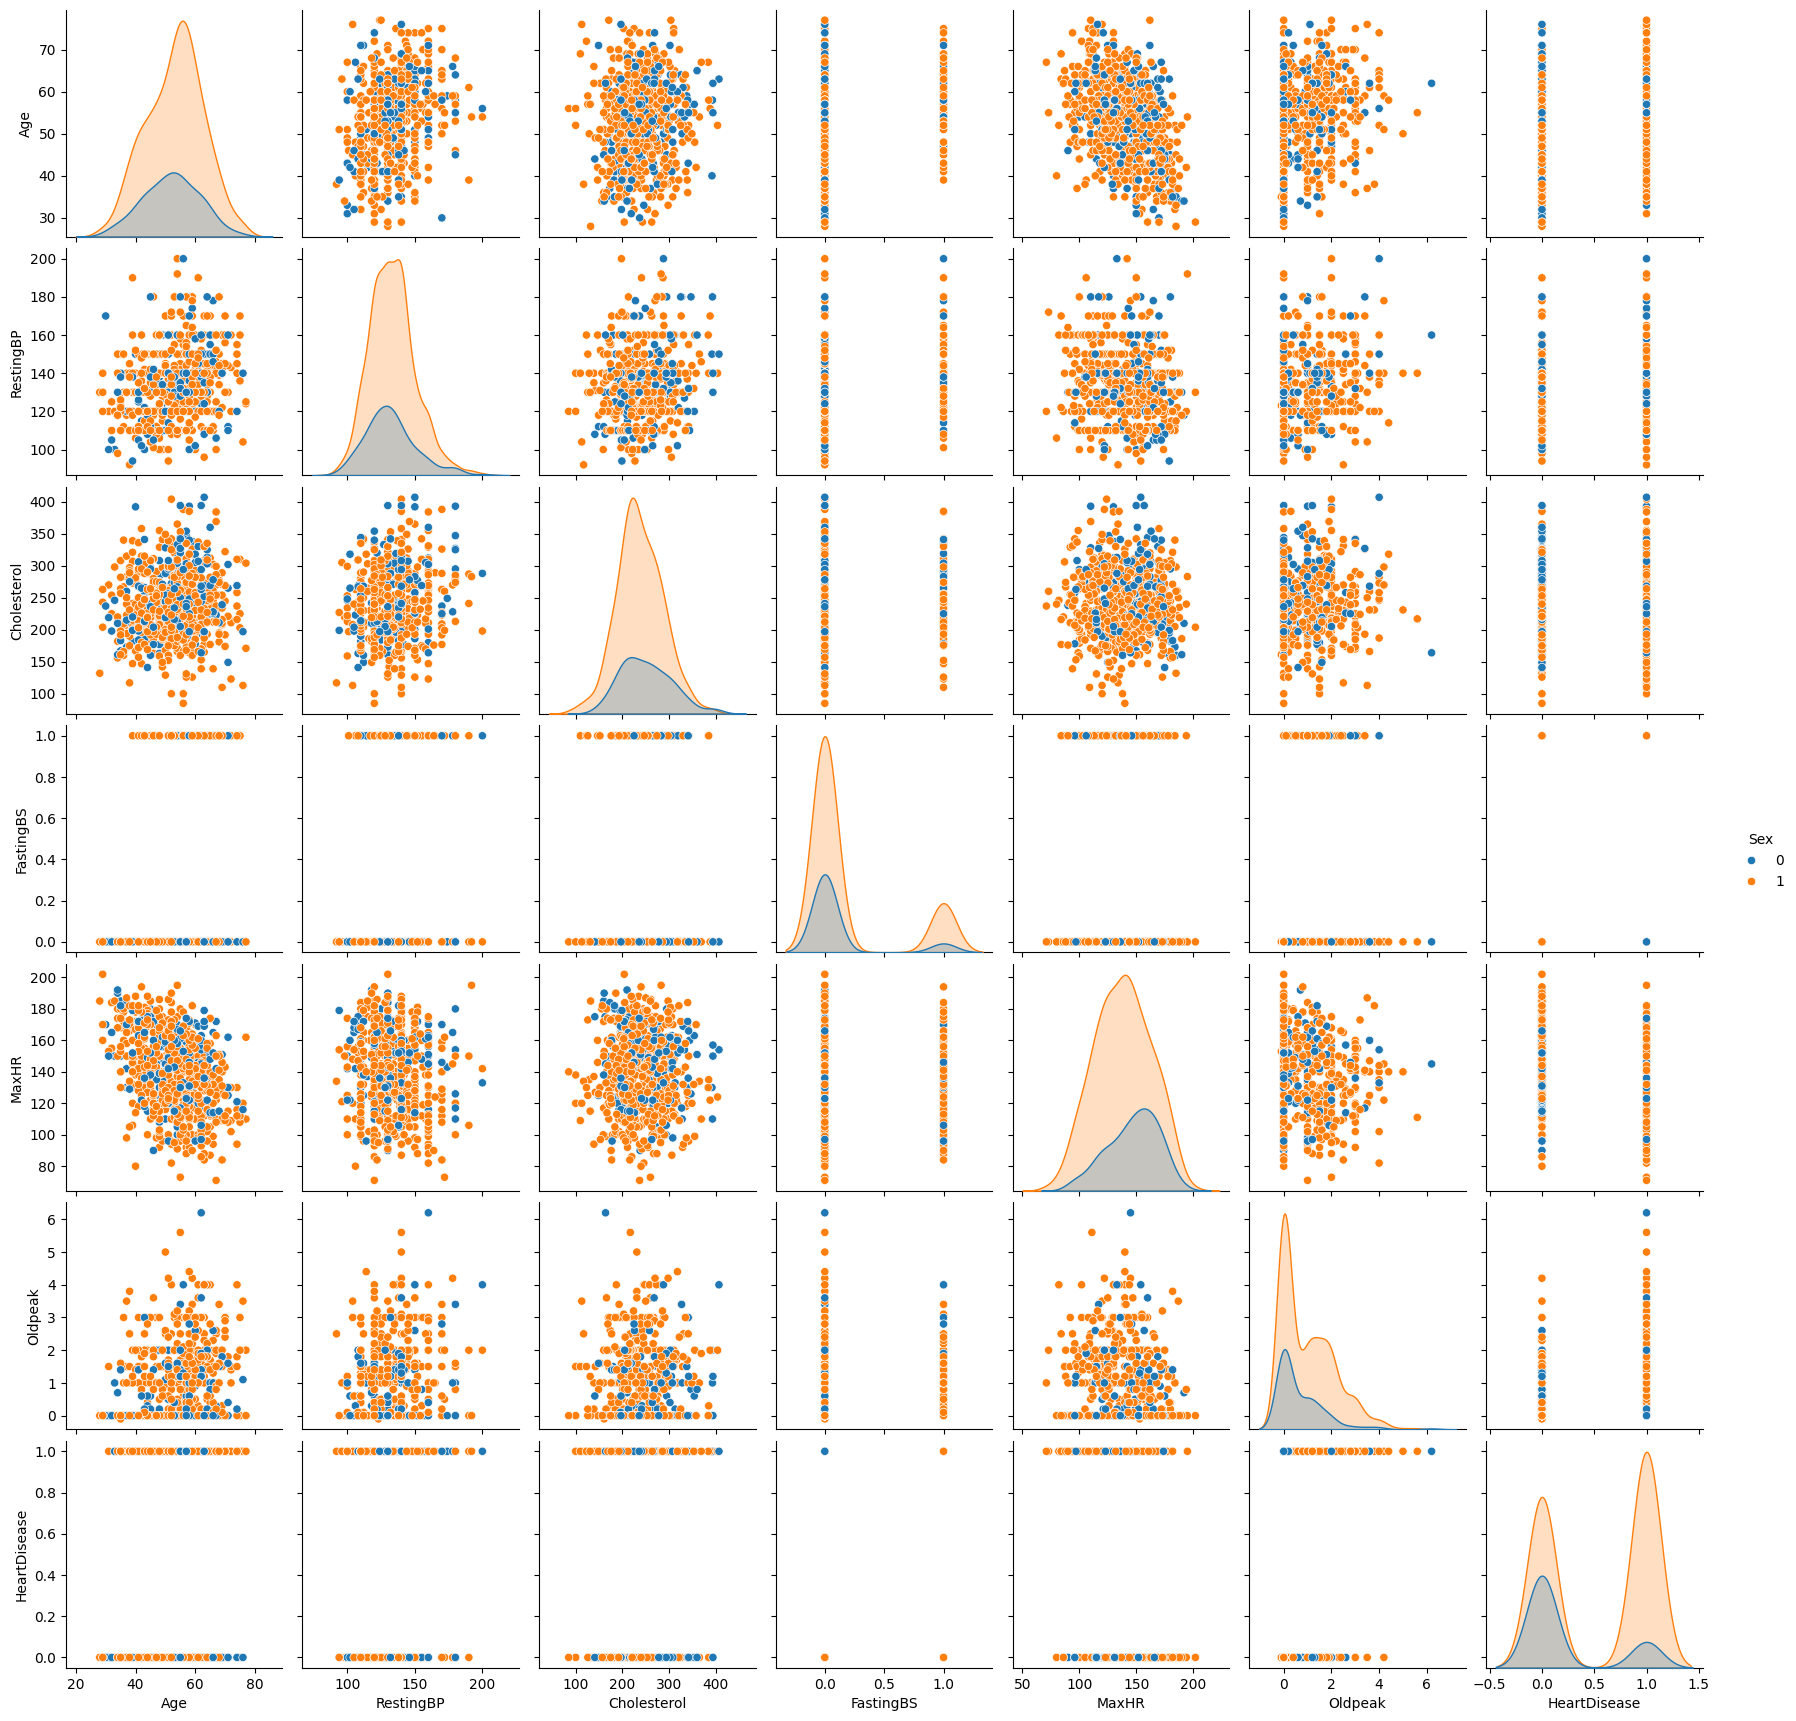

In [ ]:
sns.pairplot(df,hue='Sex')
plt.show()